Project Goal:

We will be feeding an ML classification model income data to see what demographic aspects of a person are the strongest predictors of whether that person makes less than or more than 50k ($USD) a year.

_____________________________________________________________________________________________________________________________________________________________________

Pip Installs

In [290]:
!pip install scikit-learn as sklearn

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Imports

In [291]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

Loading & Preprocessing

In [292]:
df = pd.read_csv('adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Preprocessing Step 1: Replace "?" column values with "Other"

In [293]:
# Replacing "?" with "Other" makes our data more descriptive and easier to interpret

# (df == "?").sum()   < --- Used to check which columns had "?" values

df["workclass"] = df["workclass"].replace("?", "Other")
df["occupation"] = df["occupation"].replace("?", "Other")
df["native.country"] = df["native.country"].replace("?", "Other")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Other,77053,HS-grad,9,Widowed,Other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Other,186061,Some-college,10,Widowed,Other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,Other,>50K


Preprocessing Step 2: Check and handle null values

In [294]:
df.isna().sum()

# No null values, so we can move on!

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Preprocessing Step 3: Expand columns

In [295]:
df.dtypes   #Used to determine which columns to expand. We want to expand object columns into multiple boolean columns to make things easier for our ML algorithm

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [296]:
df = pd.get_dummies(df, columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']) 
# We'll drop one of the income columns, since we only need the one column of true or false values for our ML model to predict income status
df = df.drop('income_<=50K',axis=1)
df.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Other,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,90,77053,9,0,4356,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,82,132870,9,0,4356,18,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,66,186061,10,0,4356,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,54,140359,4,0,3900,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,264663,10,0,3900,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,34,216864,9,0,3770,45,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,38,150601,6,0,3770,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,74,88638,16,0,3683,20,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8,68,422013,9,0,3683,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,41,70037,10,0,3004,60,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Setting Up ML Algorithm

In [297]:
X = df.drop(['income_>50K','fnlwgt','education.num'], axis=1)   # Features (fnlwgt is mostly irrelevant, since its just number of people with attributes close to that entry)
# We also remove education.num since its redundant with education
y = df['income_>50K'] # Target column to predict value of

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # We use 80% as our training set to ensure the algorithm is trained properly
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26048, 106), (26048,), (6513, 106), (6513,))

In [299]:
# Now to build our decision tree classifier
treeML = tree.DecisionTreeClassifier()
treeML.fit(X_train,y_train)

DecisionTreeClassifier()

In [300]:
predicted=treeML.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, predicted)
print("Accuracy: ", round(accuracy*100,2),"%")

# Looks like we get around 82% accuracy, which means a little over 4 in 5 predictions are correct. This is a pretty solid number for what we currently have.

Accuracy:  82.37 %


Evaluation

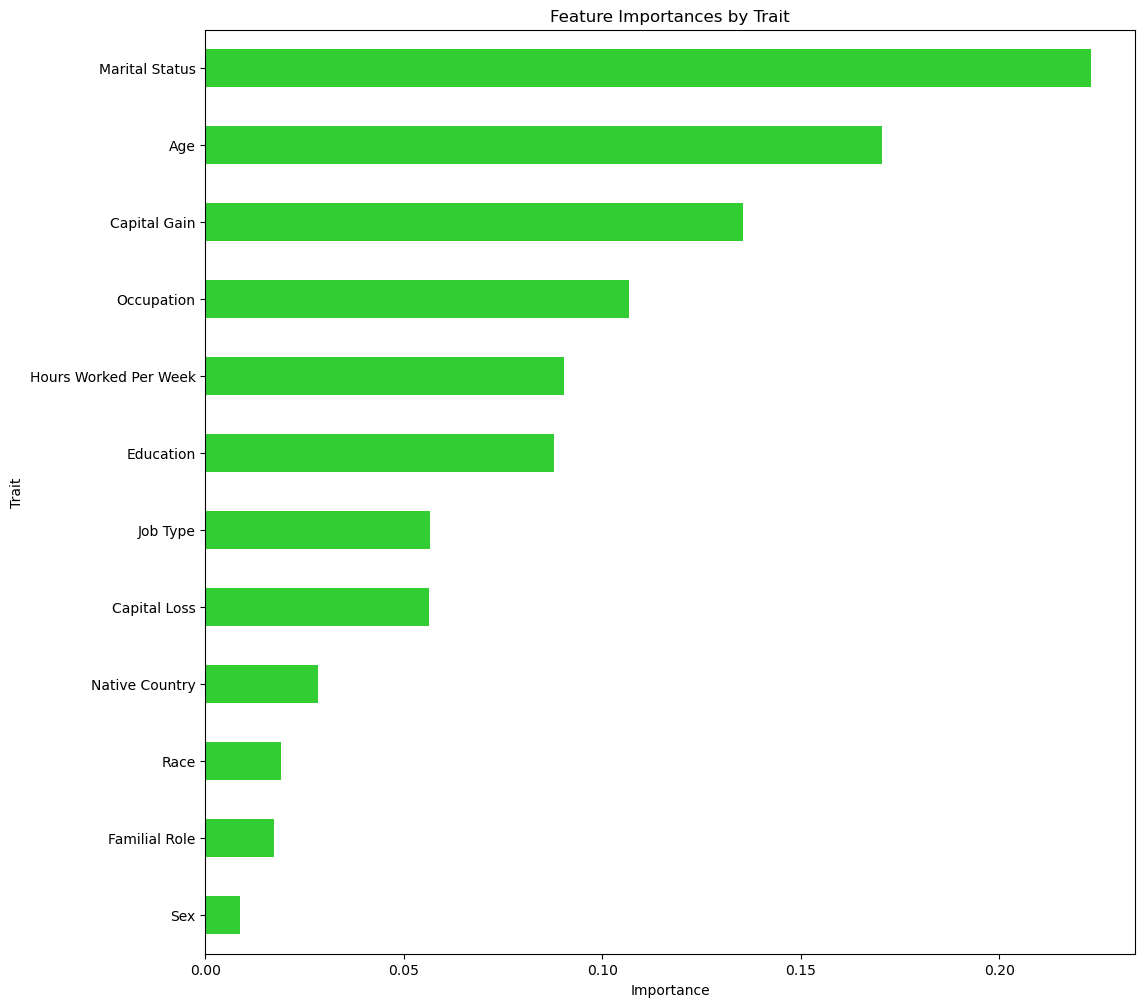

In [301]:
# Create a DataFrame of feature importances
groupBar = pd.DataFrame({
    "x": X.columns,
    "Importance": treeML.feature_importances_
})

# Map one-hot features back to their original base column
groupBar["Trait"] = groupBar["x"].apply(lambda x: x.split("_")[0] if "_" in x else x)

# Group importance by their pre-expanded columns
grouped_imp = groupBar.groupby("Trait")["Importance"].sum().sort_values(ascending=True)

# Rename columns for clarity
grouped_imp = grouped_imp.rename(index={
    "marital.status": "Marital Status",
    "age": "Age",
    "capital.gain": "Capital Gain",
    "occupation": "Occupation",
    "hours.per.week": "Hours Worked Per Week",
    "education": "Education",
    "capital.loss": "Capital Loss",
    "workclass": "Job Type",
    "native.country": "Native Country",
    "race": "Race",
    "relationship": "Familial Role",
    "sex": "Sex"
})

plt.figure(figsize=(12, 12))
grouped_imp.plot(kind="barh", color="limegreen")
plt.xlabel("Importance")
plt.title("Feature Importances by Trait")
plt.show()

Interestingly, intrinsic traits to a person, such as race, role in the family (father, mother, older brother, etc.), and sex had a minimal impact on whether someone was more or less likely to be sorted in the "<=50K" or the ">50K" income groups. Instead, the biggest predictors of income group came from age, capital gains/loss, occupation, marital status, and hours worked per week.

These importance results suggest that "progress" in life due to age and marital status are the critical deciding factors on whether someone can be predicted to make less/more than 50k a year, while traits like race and sex have a very small predictive impact.




Now we model the precision, recall, and f1-score of our model. This helps us get a closer look into the reliability statistics of our model.

In [302]:
predicted = treeML.predict(X_test)

report = metrics.classification_report(y_test, predicted, output_dict=True)
df_report = pd.DataFrame(report).T
df_report = df_report.rename(index={
    "False": "<=50K",
    "True": ">50K"
})
df_report

,precision,recall,f1-score,support
<=50K,0.884885,0.885239,0.885062,4993.000000
>50K,0.622530,0.621711,0.622120,1520.000000
accuracy,0.823737,0.823737,0.823737,0.823737
macro avg,0.753707,0.753475,0.753591,6513.000000
weighted avg,0.823657,0.823737,0.823697,6513.000000


Something interesting to note, is that the model's precision, recall, and f1-score is much lower for ">50K" than it is for "<=50K". The reason for this is because "<=50K" is a much more common result, which means the algorithm "got more practice", and therefore got better, at identifying when someone made less than 50k annually as opposed to more than 50k annually.

Now lets plot our confusion matrix, to compare our false positives to our false negatives.

In [303]:
cm = confusion_matrix(y_test, predicted)
cm = np.array([[cm[1,1], cm[0,1]],
            [cm[1,0], cm[0,0]]])
print(cm)

[[ 945  573]
 [ 575 4420]]


Note:
    
    Top Left : True Positive (Correctly Identified as >50K Income)

    Top Right : False Negative (Incorrectly Put Into <=50K Income)

    Bottom Left : False Positive (Incorrectly Put Into >50K Income)
    
    Bottom Right : True Negative (Correctly Identified as <=50K Income)

As can be seen from this confusion matrix, when handling entries that make more than 50K a year, the model was much more likely to misplace them than with the less than 50K income group (also seen in the reliability statistics report).

If we had a larger dataset with more people who earned greater than 50k annually, the model would get enough exposure for this somewhat high error rate to smooth out.

_____________________________________________________________________________________________________________________________________________________________________

Conclusion:

Factors related to life/relationship/career progression such as age, marital status, and occupation are reliable metrics in order to predict whether someone makes less or more than 50k a year. However innate characteristics such as race and sex had very little ability to determine which income group someone belonged to.

Limitations & Considerations

There are 3 main limitations to this project:

1 - Model reliability. While 82 percent model accuracy isn't bad for a more simplistic ML model like this, the somewhat low reliability when handling entries in the ">50K" income group is certainly a hindrance. This problem could be improved with a larger and more varied dataset, since this dataset has a very large "<=50K" income group bias.

2 - Scope. While this project was able to identify which demographic traits are of high predictive quality, more in-depth analytics may be needed in order to identify which trait values correlate with which income group (e.g., does old age indicate >50K or <=50K?). This is an analytics project that we could possibly tackle in the future.

3 - Granularity. Since this is a binary classification system, we have only 2 broad categories. Results may change if we were to introduce more possible income groups to sort into.